In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

 # the next lines are to fix a weird bug on my mac
 # https://stackoverflow.com/questions/53014306/error-15-initializing-libiomp5-dylib-but-found-libiomp5-dylib-already-initial
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Neural Network
Classify images of articles of clothing. Based on this [Python Notebook](https://colab.research.google.com/drive/1m2cg3D1x3j5vrFc-Cu0gMvc48gWyCOuG#forceEdit=true&sandboxMode=true&scrollTo=ZFQqW9r-ikJb).

## Keras: Deep learning framework
High level Neural Network API. Is user friendly, hides a lot of the mathematical complexity. Good for fast experimentation. No need to build neural networks from scratch.

## What is a Neural Network
Deep neural network: representation of data in layers.
"Deep" = presence of multiple layers.
Algorithms like linear regression do not transform or modify the data, has only one layer.
A Neural Network applies specific operations to transform the data on each layer in order to learn more about it.
By learning more it can make better predictions.

### Data 
Four main categories of type of data:
* Vector Data (2D)
* Timeseries or Sequence (3D)
* Image Data (4D)
* Video Data (5D)

### Layers 
Each NN contains multiple layers:
* Input Layer: first layer, initial data is passed 
* Output Layer: last layer, once the data has passed trough all layers result is retrieved
* Hidden Layer(s): all other layers. Not observable, at least one layer in NN. But can have unlimited amount. The more complex the NN is the more hidden layers.

### Neurons
Each layer is made up of neurons. Responsible for generating, holding or passing one numeric value.
E.g. processing an image of 28 x 28 pixels = 784 pixels => 784 neurons in input layer.
10 categories of image classes => 10 output neurons.
Hidden layers has as many neurons as we want it to have.

### Connected layers
**dense** layer: each neuron in one layer is connected to all the neurons in the next layer.
Can be connected in other ways.

### Weights
Every connection between neurons have a weight. It is modified during the training process as it sees the data.
To achieve the result the NN will figure out these numbers.
Weights start from a constant or random.

### Biases
Extra neuron without connection with constant value in each layer.
Will also change during the training of the NN.
Can shift each Activation Function.

### Activation Function
Is applied to the weighted sum of a neuron.
Used to make better predictions.
For example:
* Relu = Rectified Linear unit. Values between 0 and infinity
* Tanh = Hyperbolic Tangent. Values between -1 and 1
* Sigmoid. Values between 0 and 1

## Backpropagation
Algorithm behind training of the network.
Changes the weights and biases in the network.
### Optimizer

Function that implements the backpropagation algorithm.
List of a few common ones:
* Gradient Descent
* Stochastic Gradient Descent
* Mini-Batch Gradient Descent
* Momentum
* Nesterov Accelerated Gradient

## Loss/ Cost Function
Network starts not knowing what it is doing: ranodm weights, random biases.
Evaluation of learning progress.

E.g.
* Squared Error
* Mean Absolute Error
* Hinge Loss

Compare output of NN from expected output. Based on the difference calculates a value how well it did.
If it did good: minor changes in bias and weights. If not, changes more.
Tries to get the number as low as possible.

## Gradient Descent
Algorithm to find the optimal parameters. Very mathematical, closely related to backpropagation. Chooses a path of steepest descent to minimize functions.


In [4]:
# dataset provided by keras
# contains 60,000 images for training and 10,000 for testing
# images are 28 x 28 px
# pixle value is between 0 and 255, so a grayscale image
fashion_mnist = keras.datasets.fashion_mnist

 # split into tetsing and training tuple
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
# labels are integers from 0 - 9, they represent 10 different clothing items
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

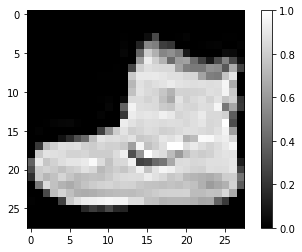

In [29]:
# generates picture of the first item in the dataset
def showItem(index):
    plt.figure()
    plt.imshow(train_images[index], cmap='gray')
    plt.colorbar()
    plt.show()

showItem(0)

In [7]:
# Data processing:
# scale the grayscale values between 0 and 1
# makes it easier to process for our NN
train_images = train_images / 255.0
test_images = test_images / 255.0

## Building the model
**Input Layer:**

Use flatten layer ```keras.layers.Flatten``` with an input shape of (28,28) so it conists of 784 neurons
Each pixel will be associated with one neuron.

**Hidden Layer:**
This is our first and only hidden layer.
The ```keras.layers.Dense``` denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer.
It has 128 neurons and uses the rectify linear unit activation function.

***Output Layer:***
Also a dense layer.
10 neurons that represents the probabillity of a given image being one of the 10 different classes.
The activation function softmax is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.


In [8]:
# creating the model
input_layer = keras.layers.Flatten(input_shape=(28, 28))
hidden_layer = keras.layers.Dense(128, activation='relu')
output_layer = keras.layers.Dense(10, activation='softmax')

model = keras.Sequential([
    input_layer, hidden_layer, output_layer
])

# architecture of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
# compiling the model
# defining the loss function and what we would like to track
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# training the model
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.4918 - accuracy: 0.8275
Epoch 2/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3759 - accuracy: 0.8634
Epoch 3/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.3376 - accuracy: 0.8771
Epoch 4/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3134 - accuracy: 0.8847
Epoch 5/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2951 - accuracy: 0.8910
Epoch 6/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2835 - accuracy: 0.8948
Epoch 7/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2702 - accuracy: 0.8990
Epoch 8/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.2586 - accuracy: 0.9045
Epoch 9/10
60000/60000 [==============================] - 19s 314us/sample - loss: 0.2493 - accuracy: 0.9079
Epoch

## Evaluate the Model

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0) 

print('Test accuracy:', test_acc)

Test accuracy: 0.8819


In [32]:
predictions = model.predict(test_images)

predictionIndex = 0
prediction = predictions[predictionIndex]

In [38]:
index_best = np.argmax(prediction)
print('Predicted:', class_names[index_best])
print('For actual:', class_names[test_labels[predictionIndex]])

Predicted: Ankle boot
For actual: Ankle boot
